In [1]:
# importing packages
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [17]:
def generate_terrain(shape, peaks):
    """
    Generates a 2D terrain with several peaks of varying heights.
    Args:
        shape (tuple): The shape of the terrain, (x, y).
        peaks (list): A list of peak parameters, [(x1, y1, h1), (x2, y2, h2), ...].
            Each peak parameter is a tuple (x, y, h) where (x, y) is the location
            of the peak and h is its height.
    Returns:
        ndarray: The generated terrain.
    """
    

    #This is the terrain creator
    x, y = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]))
    terrain = np.zeros_like(x, dtype=float)
    for peak in peaks:
        dist = np.sqrt((x - peak[0])**2 + (y - peak[1])**2)
        prob = np.exp(peak[2])
        terrain += prob * np.exp(-dist**2 / (2*prob**2))
    return terrain


In [75]:
terrain

array([1.16329065e-05, 1.23138520e-05, 1.30330953e-05, ...,
       8.55619043e-01, 8.30298102e-01, 8.05597204e-01])

In [23]:
#Random generation of tuples and generating terrains from these tuples

def generate_peaks(n_terrains, shape):
    peaks_list = []
    for i in range(n_terrains):
        # Define random peaks as a list of (x, y, height) tuples
        peaks = []
        for j in range(np.random.randint(3, 6)): # number of peaks in each terrain
            x = np.random.randint(shape[0])
            y = np.random.randint(shape[1])
            h = np.random.randint(1, 6)
            peaks.append((x, y, h))
        peaks_list.append(peaks)
    return peaks_list


10

In [21]:
shape = (1000, 1000)

peaks_list = generate_peaks(10, shape)

terrains = [generate_terrain(shape, peaks) for peaks in peaks_list]

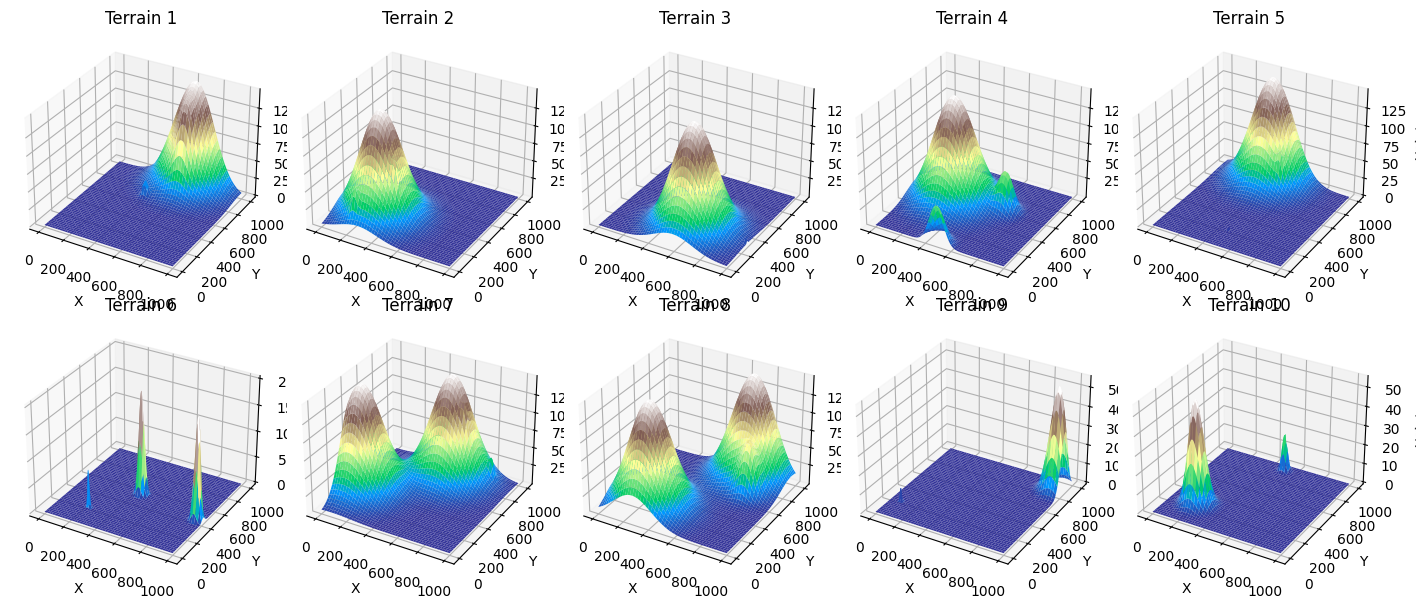

In [22]:
# Create a 2x5 grid of 3D plots of the terrains
fig = plt.figure(figsize=(14, 6))
for i in range(len(peaks_list)):
    ax = fig.add_subplot(2, 5, i+1, projection='3d')
    x, y = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]))
    ax.plot_surface(x, y, terrains[i], cmap='terrain')
    ax.set_title('Terrain {}'.format(i+1))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Height')
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

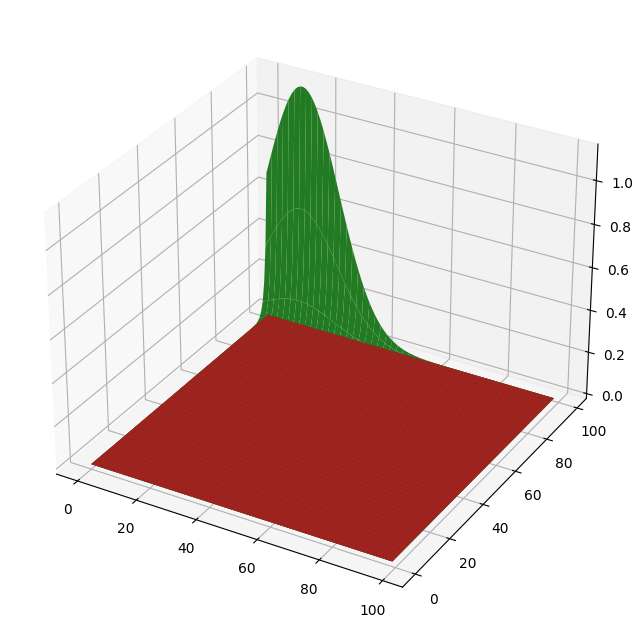

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_peak(mean_height=200, sd_height=20, mean_width=10, sd_width=2):
    height = np.random.normal(loc=mean_height, scale=sd_height)
    width = np.random.normal(loc=mean_width, scale=sd_width)
    gradient = np.random.normal(loc=1, scale=0.1)
    return (height, width, gradient)

def generate_terrain(shape, num_peaks):
    peaks = []
    for i in range(num_peaks):
        while True:
            peak = generate_peak()
            if all(abs(peak[1] - p[1]) >= peak[1] + p[1] for p in peaks):
                peaks.append(peak)
                break
    x, y = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]))
    terrain = np.zeros_like(x, dtype=float)
    for peak in peaks:
        dist = np.sqrt((x - peak[1])**2 + (y - peak[0])**2)
        prob = peak[2]
        terrain += peak[0] * np.exp(-dist**2 / (2*peak[1]**2)) * prob
    return terrain

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(10):
    terrain = generate_terrain((100, 100), np.random.randint(3, 7))
    x, y = np.meshgrid(np.arange(terrain.shape[0]), np.arange(terrain.shape[1]))
    ax.plot_surface(x, y, terrain)

plt.show()
